In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from plotly.subplots import make_subplots
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12



In [128]:

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv file/covid_19_india.csv")
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [129]:
data.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [130]:
data.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818
16849,16850,2021-07-07,8:00 AM,West Bengal,-,-,1472132,17834,1507241


In [131]:
data.describe()

,Sno,Cured,Deaths,Confirmed
count,16850.000000,1.685000e+04,16850.000000,1.685000e+04
mean,8425.500000,2.360353e+05,3485.222552,2.583667e+05
std,4864.320353,5.225438e+05,9330.541749,5.672808e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4213.250000,2.658500e+03,22.000000,3.644750e+03
50%,8425.500000,2.889500e+04,453.000000,3.336150e+04
75%,12637.750000,2.537510e+05,3071.250000,2.666530e+05
max,16850.000000,5.872268e+06,123531.000000,6.113335e+06


In [132]:
data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [137]:
data["Active"] = data["Confirmed"] - data["Cured"] - data["Deaths"]

In [134]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3


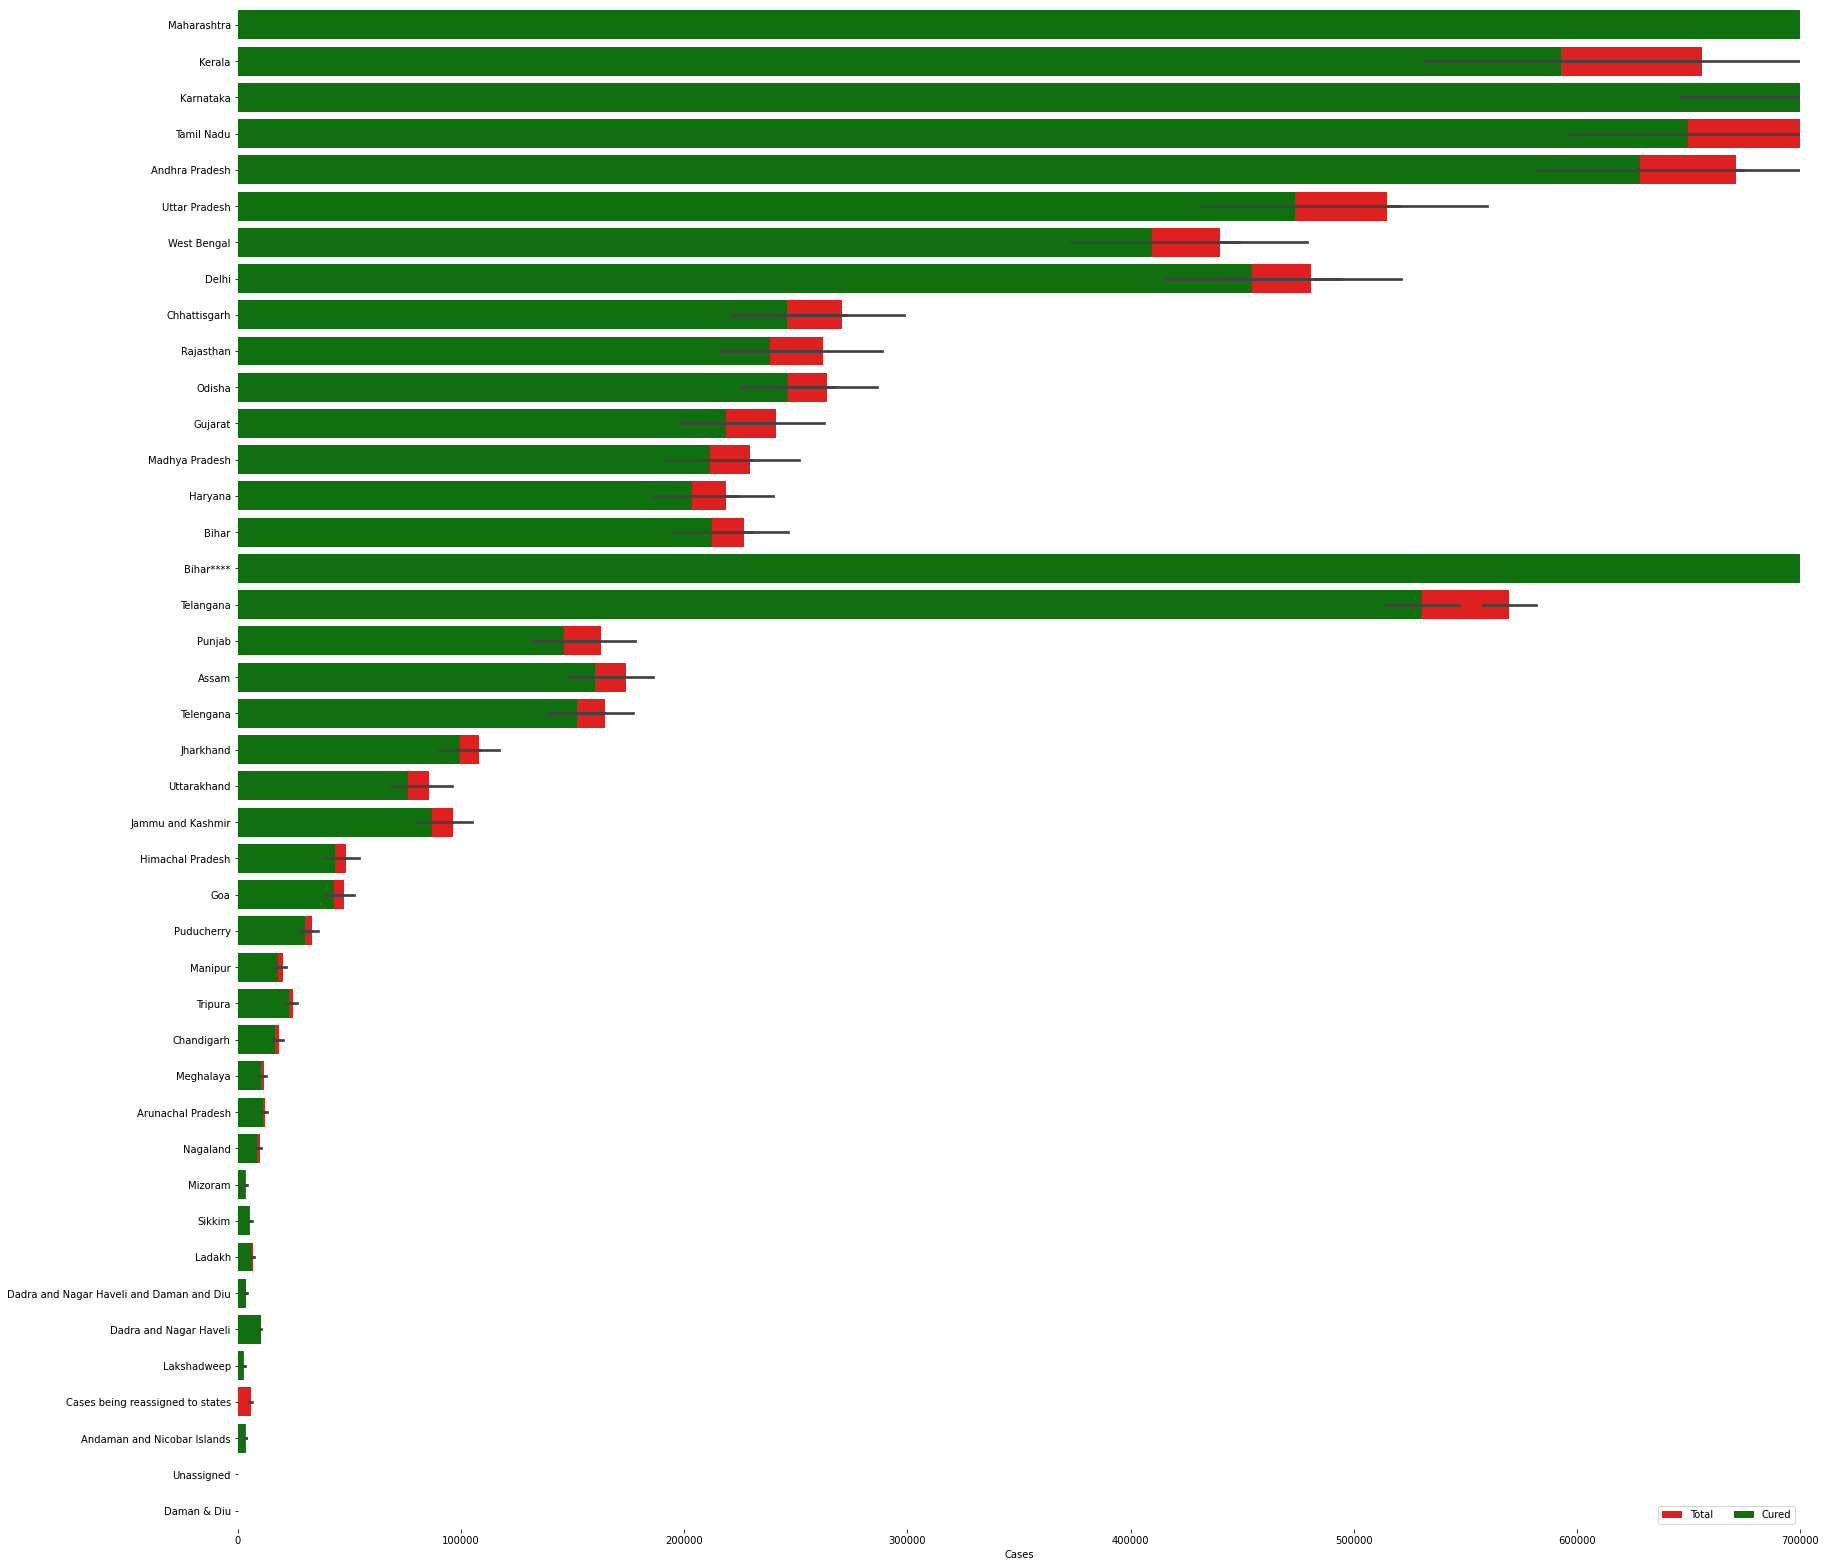

In [135]:
f, ax = plt.subplots(figsize=(28, 28))
data = data[['State/UnionTerritory','Confirmed','Cured','Deaths']]   
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 700000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [138]:
state_wise = data.groupby('State/UnionTerritory')['Confirmed','Cured','Deaths','Active'].sum()
state_wise["Mortality Rate"] = ((state_wise["Deaths"] / state_wise["Confirmed"]) * 100)
state_wise["Recovery Rate"] = ((state_wise["Cured"]*100 )/ state_wise["Confirmed"])
state_wise = state_wise.sort_values(by = "Confirmed", ascending = False).reset_index()
state_wise.style.background_gradient(cmap='autumn')

,State/UnionTerritory,Confirmed,Cured,Deaths,Active,Mortality Rate,Recovery Rate
0,Maharashtra,908892470,813788907,19314532,75789031,2.125062,89.536324
1,Karnataka,387597335,345648926,4819018,37129391,1.243305,89.177323
2,Kerala,344319045,311127643,1327754,31863648,0.385617,90.360277
3,Tamil Nadu,342829697,317067499,4731627,21030571,1.380168,92.485424
4,Andhra Pradesh,324146783,303427899,2475816,18243068,0.763795,93.608178
5,Uttar Pradesh,252843682,232529439,3347656,16966587,1.324002,91.965691
6,Delhi,236972842,224062704,4066907,8843231,1.716191,94.552060
7,West Bengal,209822848,195296839,3214840,11311169,1.532169,93.077013
8,Rajasthan,128998101,117312772,1159823,10525506,0.899101,90.941472
9,Chhattisgarh,128751782,117163544,1591126,9997112,1.235809,90.999551


In [139]:
total_cases=data.groupby('State/UnionTerritory')['Confirmed'].sum()
recovered=data.groupby('State/UnionTerritory')['Cured'].sum()

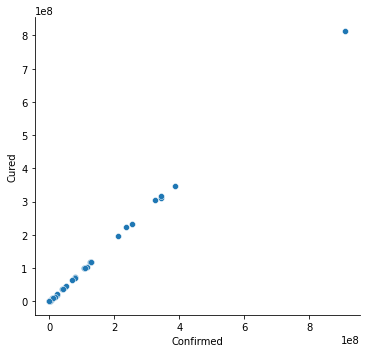

In [140]:
sns.relplot(x=total_cases ,y=recovered , data=data )

## **Testing Details**

In [141]:
df_testing=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/csv file/StatewiseTestingDetails.csv")

In [142]:
df_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [151]:
df_testing.columns

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')

In [154]:
df_testing.tail

<bound method NDFrame.tail of              Date                        State  TotalSamples Negative  Positive
0      2020-04-17  Andaman and Nicobar Islands        1403.0     1210      12.0
1      2020-04-24  Andaman and Nicobar Islands        2679.0      NaN      27.0
2      2020-04-27  Andaman and Nicobar Islands        2848.0      NaN      33.0
3      2020-05-01  Andaman and Nicobar Islands        3754.0      NaN      33.0
4      2020-05-16  Andaman and Nicobar Islands        6677.0      NaN      33.0
...           ...                          ...           ...      ...       ...
15108  2021-07-02                  West Bengal    14325099.0      NaN       NaN
15109  2021-07-03                  West Bengal    14377860.0      NaN       NaN
15110  2021-07-04                  West Bengal    14430084.0      NaN       NaN
15111  2021-07-05                  West Bengal    14470472.0      NaN       NaN
15112  2021-07-06                  West Bengal    14516751.0      NaN       NaN

[15113 ro

In [143]:
df_sample=df_testing.groupby('State')['TotalSamples'].sum().sort_values(ascending=False).reset_index()
df_sample.head()

,State,TotalSamples
0,Uttar Pradesh,9.155562e+09
1,Bihar,6.121330e+09
2,Maharashtra,5.703823e+09
3,Karnataka,5.453629e+09
4,Tamil Nadu,5.436042e+09


In [144]:
px.bar(df_sample.head(10),x='State',y='TotalSamples')

In [145]:
df_positive=df_testing.groupby('State')['Positive'].sum().sort_values(ascending=False).reset_index()


In [146]:
px.bar(df_positive.head(10),x='State',y='Positive')

# **Vaccine Details**

In [147]:
df_vaccine=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/csv file/covid_vaccine_statewise.csv')

In [148]:
df_vaccine.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [149]:
df_vaccine.columns

Index(['Updated On', 'State', 'Total Doses Administered',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered',
       'Total Sputnik V Administered', 'AEFI', '18-45 years (Age)',
       '45-60 years (Age)', '60+ years (Age)', 'Total Individuals Vaccinated'],
      dtype='object')

In [150]:
df_vaccine.tail()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
6694,11/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6695,12/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6696,13/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6697,14/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6698,15/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
Covaxin = df_vaccine["Total Covaxin Administered"].sum() 
Covishield = df_vaccine["Total CoviShield Administered"].sum()  
SputnikV = df_vaccine["Total Sputnik V Administered"].sum() 
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated","Sputnik V vaccinated"],values=[Covaxin,Covishield,SputnikV],title="Covaxin,Covishield and Sputnik V Vaccination")

In [161]:
first = df_vaccine["First Dose Administered"].sum() 
second = df_vaccine["Second Dose Administered"].sum()  
px.pie(names=["First Dose","Second Dose"],values=[first, second],title="first dose and second dose")

In [168]:
between = df_vaccine["18-45 years (Age)"].sum() 
between45 = df_vaccine["45-60 years (Age)"].sum() 
above = df_vaccine["60+ years (Age)"].sum() 
px.pie(names=["between(18-45)","between(45-60) ","above(60)"],values=[between,between45,above],title="between(18-45),between(45-60)and above(60) vaccinated ")